# CSE-CIC-IDS 2017 Naive Bayes

In [1]:
model_id = "naivebayes3-normalize"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import glob

In [3]:
NOTEBOOK_PATH = "C:/Users/Xetrov/Desktop/SciFair20/Code/"

In [4]:
x_scaled = pd.read_csv(NOTEBOOK_PATH + "IDS2017/x_scaled_powertransform.csv")

y_df_enc = pd.read_csv(NOTEBOOK_PATH + "IDS2017/y_all_binary.csv")

# Normalize

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
scaler = MinMaxScaler()

In [7]:
x_norm = scaler.fit_transform(x_scaled)

# Split data into train and test

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_valtest, y_train, y_valtest = train_test_split(x_norm, y_df_enc, test_size = 0.4, random_state = 42)

In [10]:
x_val, x_test, y_val, y_test = train_test_split(x_valtest, y_valtest, test_size = 0.5, random_state = 42)

In [11]:
del x_train
del y_train
del x_valtest 
del y_valtest

In [12]:
print("\nValidation:")
print(y_val['IsAttack'].value_counts())
print("\nTest:")
print(y_test['IsAttack'].value_counts())


Validation:
0    454207
1    111942
Name: IsAttack, dtype: int64

Test:
0    454790
1    111359
Name: IsAttack, dtype: int64


# ADASYN

In [26]:
x_train_res = pd.read_csv(NOTEBOOK_PATH + "IDS2017/x_adasyn_binary.csv")

In [14]:
x_train_norm = scaler.transform(x_train_res)

In [15]:
y_train_res = pd.read_csv(NOTEBOOK_PATH + "IDS2017/y_adasyn_binary.csv")['IsAttack']

In [16]:
del x_train_res

# Train model

In [20]:
x_train_norm.shape

(2727615, 68)

In [24]:
list(x_scaled.columns).index("Init_Win_bytes_forward")

56

In [29]:
type(x_train_res)

pandas.core.frame.DataFrame

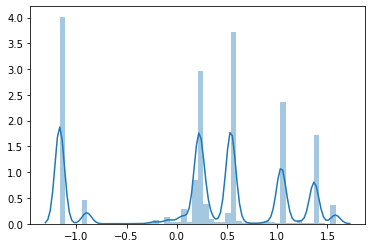

In [30]:
sns.distplot(x_train_res.to_numpy()[:,56])

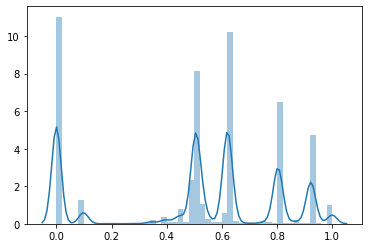

In [25]:
sns.distplot(x_train_norm[:,56])

In [21]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB

In [40]:
%%time
clf = GaussianNB().fit(x_train_norm, y_train_res)

Wall time: 3.75 s


**Save model**

In [14]:
import pickle

In [15]:
import time

model_filename = model_id  + " [" + time.strftime("%Y%m%d %H%M") + "]"

In [16]:
save_file = open(NOTEBOOK_PATH + "Models/" + model_filename + ".pkl", "wb")
saved_model = pickle.dump(clf, save_file)
save_file.close()

**Test model**

In [41]:
pred = clf.predict(x_val)

In [42]:
pred_series = pd.Series(pred, name="Pred").replace({0: 'Benign', 1: 'Attack'})
y_series = pd.Series(y_val.to_numpy().ravel(), name="Actual").replace({0: 'Benign', 1: 'Attack'})

matrix = pd.crosstab(pred_series, y_series, margins=True)
matrix

Actual,Attack,Benign,All
Pred,,,
Attack,106515,376553,483068
Benign,5427,77654,83081
All,111942,454207,566149


# Test Set

In [43]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [44]:
pred = clf.predict(x_test)
y_test_npy = y_test.to_numpy().ravel()

precision = precision_score(y_test_npy, pred)
print("Precision:", precision)

recall = recall_score(y_test_npy, pred)
print("Recall:", recall)

f1 = f1_score(y_test_npy, pred)
print("F1:", f1)

Precision: 0.21943090878228722
Recall: 0.9519122836950763
F1: 0.35664863864613205


In [39]:
pred_series = pd.Series(pred, name="Pred").replace({0: 'Benign', 1: 'Attack'})
y_series = pd.Series(y_test.to_numpy().ravel(), name="Actual").replace({0: 'Benign', 1: 'Attack'})

matrix = pd.crosstab(pred_series, y_series, margins=True)
matrix

Actual,Attack,Benign,All
Pred,,,
Attack,53398,123863,177261
Benign,57961,330927,388888
All,111359,454790,566149


# Log results

In [22]:
model_log = open(NOTEBOOK_PATH + "model_log.txt", "a")

model_log.write("\n" + model_filename)
model_log.write("\n\tF1 Micro: " + str(f1_micro))
model_log.write("\n\tF1 Macro: " + str(f1_macro))

model_log.close()